In [6]:
import pandas as pd
from IPython.display import display
import nx_analysis
from graphviz_analysis import render_gvz


In [7]:
prompts_df = pd.read_csv('prompts.csv', index_col= 0, dtype= 'str')


# Transalte DOT format to networkx graph 
prompts_df['nx_graph'] = prompts_df['label_graphs'].apply(nx_analysis.graphviz_2_nx)
display(prompts_df.head(2))


,dynamic_hypothesis,variables,label_graphs,Unnamed: 4,nx_graph
Case,,,,,
1,"The order rate decision, if it is to bring act...","order rate, inventory, desired inventory, adju...","digraph {\n""order rate"" -> ""inventory"" [arrowh...",NaN,"(order rate, inventory, desired inventory, adj..."
2,A hot cup of coffee will gradually cool down t...,"coffee temperature, discrepancy, cooling rate,...","digraph {\n""coffee temperature"" -> ""discrepanc...",NaN,"(coffee temperature, discrepancy, cooling rate..."


In [8]:

# Get the variables from the graph
for ind in prompts_df.index:
    nxg = prompts_df['nx_graph'][ind]
    nxg_nodes = list(nxg.nodes)
    print(nxg_nodes)
    delim = ','
    prompts_df['variables'][ind] = delim.join(nxg_nodes)

# prompts_df['vars'] = prompts_df['nx_graph'].nodes()

['order rate', 'inventory', 'desired inventory', 'adjustment time']
['coffee temperature', 'discrepancy', 'cooling rate', 'room temperature']
['E. Coli Bacteria', 'reproduction', 'Reproduction Fraction']
['smoking', 'cigarettes smoked', 'need for cigarettes', 'addiction time']
['radioactive nuclei', 'decay', 'decay constant']
['dieting', 'weight', 'amount overweight', 'time for dieting to reduce weight', 'desired weight']
['births', 'rabbit population', 'birth fraction']
['skunk population', 'deaths', 'death fraction']
['interest payments', 'money in bank account', 'interest rate']
['brownies in stomach', 'digesting', 'time to digest']
['contagion', 'infected people', 'infection fraction']
['spread of panic', 'panic', 'spreading fraction']
['inventory of cars at dealership', 'market price', 'car production', 'retail car sales']
['births', 'population', 'deaths', 'brith rate', 'death rate']
['flowered area', 'growth', 'decay', 'empty area', 'decay rate', 'growth rate', 'fraction occupie

In [9]:
display(prompts_df)


,dynamic_hypothesis,variables,label_graphs,Unnamed: 4,nx_graph
Case,,,,,
1,"The order rate decision, if it is to bring act...","order rate,inventory,desired inventory,adjustm...","digraph {\n""order rate"" -> ""inventory"" [arrowh...",NaN,"(order rate, inventory, desired inventory, adj..."
2,A hot cup of coffee will gradually cool down t...,"coffee temperature,discrepancy,cooling rate,ro...","digraph {\n""coffee temperature"" -> ""discrepanc...",NaN,"(coffee temperature, discrepancy, cooling rate..."
3,The number of E. coli bacteria in the flask in...,"E. Coli Bacteria,reproduction,Reproduction Fra...","digraph {\n""E. Coli Bacteria"" -> ""reproduction...",NaN,"(E. Coli Bacteria, reproduction, Reproduction ..."
4,"The more my uncle smokes, the more addicted he...","smoking,cigarettes smoked,need for cigarettes,...","digraph {\n""smoking"" -> ""cigarettes smoked"" [a...",NaN,"(smoking, cigarettes smoked, need for cigarett..."
5,Negative feedback system is the gradual decay ...,"radioactive nuclei,decay,decay constant","digraph {\n""radioactive nuclei"" -> ""decay"" [ar...",NaN,"(radioactive nuclei, decay, decay constant)"
6,"The more I am overweight, the more I diet, whi...","dieting,weight,amount overweight,time for diet...","digraph {\n""dieting"" -> ""weight"" [arrowhead = ...",NaN,"(dieting, weight, amount overweight, time for ..."
7,"The larger the population, the greater the num...","births,rabbit population,birth fraction","digraph {\n""births"" -> ""rabbit population"" [ar...",NaN,"(births, rabbit population, birth fraction)"
8,The number of deaths each year is a certain fr...,"skunk population,deaths,death fraction","digraph {\n""skunk population"" -> ""deaths"" [arr...",NaN,"(skunk population, deaths, death fraction)"
9,Interest payments are calculated by multiplyin...,"interest payments,money in bank account,intere...","digraph {\n""interest payments"" -> ""money in ba...",NaN,"(interest payments, money in bank account, int..."


In [10]:
prompts_df.to_csv('prompts_vars.csv')

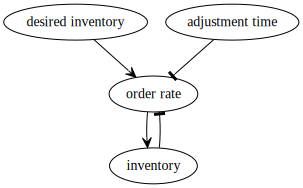

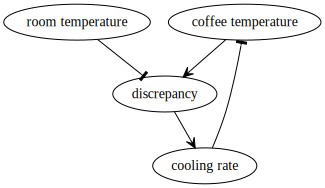

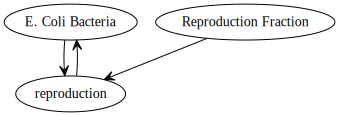

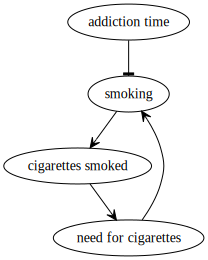

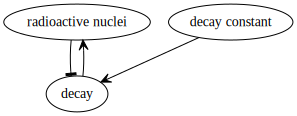

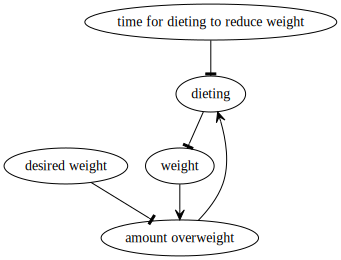

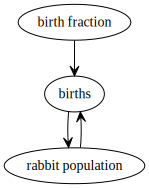

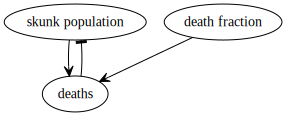

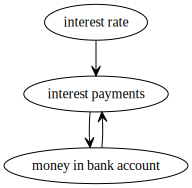

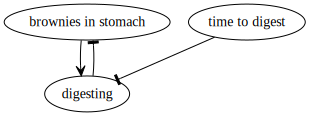

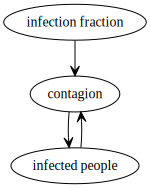

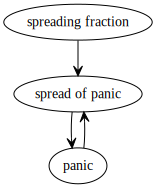

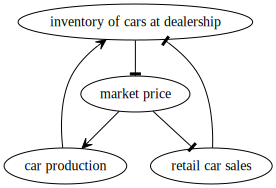

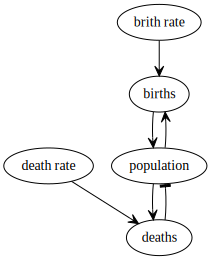

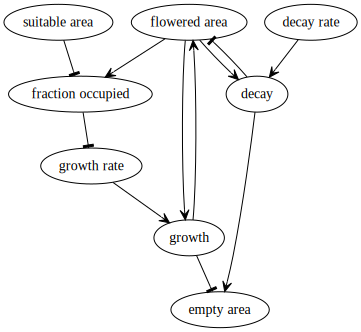

In [11]:
for ind in prompts_df.index:
    g = prompts_df['label_graphs'][ind]
    render_gvz(g, ind,"label")